# Deep Neural Network KD Classifier

In [11]:
# Imports
import sys
sys.path.append('../') # Make parent folder visible
from preprocess import load_data
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle as pkl
from deepnet.deep_model import DeepKDModel
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score, precision_score, roc_curve
import numpy as np

# Load data
x_train, x_test, y_train, y_test = load_data.load(one_hot=False)

In [2]:
# Feature normalization
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [3]:
# Init model
clf = DeepKDModel(num_hidden_layers=1,
                  num_nodes_initial=50,
                 num_nodes_scaling_factor=0.5,
                 epochs=356,
                 learning_rate=7.168e-05,
                 batch_size=16,
                 dropout=0.695)

# Train model
clf.train(x_train, y_train, weights_folder='../deepnet/')

In [23]:
# Make predictions
logits_pred = clf.predict(x_test, weights_folder='../deepnet/') # return logits
y_pred_binary = np.argmax(logits_pred, axis=1)
y_prob_logits = logits_pred[:, 1]

INFO:tensorflow:Restoring parameters from ../deepnet/deep_kd_model


In [24]:
# Evaluate predictions
print('Accuracy: ', accuracy_score(y_test, y_pred_binary))
print('Precision: ', precision_score(y_test, y_pred_binary))
print('Recall: ', recall_score(y_test, y_pred_binary))
print('F1 Score: ', f1_score(y_test, y_pred_binary))
print('ROC AUC: ', roc_auc_score(y_test, y_prob_logits))

Accuracy:  0.930463576159
Precision:  0.948207171315
Recall:  0.967479674797
F1 Score:  0.957746478873
ROC AUC:  0.965882694541


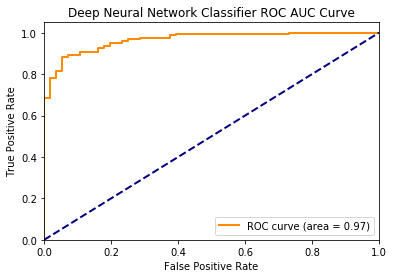

In [26]:
# Plot ROC Curve
roc = roc_curve(y_test, y_prob_logits)
fpr, tpr, thresholds = roc
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_logits))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deep Neural Network Classifier ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()